# Here we draw example trees from the AI ecosystem dataset

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

model_expanded = pd.read_csv("ai_ecosystem_dataset.csv")

In [2]:
model_expanded

,Unnamed: 0,model_id,likes,trendingScore,private,downloads,tags,pipeline_tag,library_name,createdAt,parent_model,finetune_parent,quantized_parent,adapter_parent,merge_parent,license,region,arxiv_id,languages
0,0,moonshotai/Kimi-K2-Instruct,479,479.0,False,13356,"['transformers', 'safetensors', 'kimi_k2', 'te...",text-generation,transformers,2025-07-11T00:55:12.000Z,[],[],[],[],[],other,us,NaN,[]
1,1,THUDM/GLM-4.1V-9B-Thinking,569,367.0,False,33839,"['transformers', 'safetensors', 'glm4v', 'imag...",image-text-to-text,transformers,2025-06-28T14:24:10.000Z,['THUDM/GLM-4-9B-0414'],['THUDM/GLM-4-9B-0414'],[],[],[],mit,us,2507.01006,"['en', 'zh']"
2,2,HuggingFaceTB/SmolLM3-3B,351,351.0,False,21863,"['transformers', 'safetensors', 'smollm3', 'te...",text-generation,transformers,2025-07-08T10:11:45.000Z,[],[],[],[],[],apache-2.0,us,NaN,"['en', 'fr', 'es', 'it', 'pt', 'zh', 'ar', 'ru']"
3,3,black-forest-labs/FLUX.1-Kontext-dev,1568,247.0,False,230863,"['diffusers', 'safetensors', 'image-generation...",image-to-image,diffusers,2025-05-28T22:23:43.000Z,[],[],[],[],[],other,us,2506.15742,['en']
4,4,mistralai/Devstral-Small-2507,155,155.0,False,5090,"['vllm', 'safetensors', 'mistral', 'text2text-...",text-generation,vllm,2025-07-04T14:23:44.000Z,['mistralai/Mistral-Small-3.1-24B-Instruct-2503'],['mistralai/Mistral-Small-3.1-24B-Instruct-2503'],[],[],[],apache-2.0,us,NaN,"['en', 'fr', 'de', 'es', 'pt', 'it', 'ja', 'ko..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860406,1860406,Amal17/NusaBERT-concate-BiGRU-NusaParagraph-emot,0,0.0,False,0,"['license:apache-2.0', 'region:us']",NaN,NaN,2025-07-12T17:13:42.000Z,[],[],[],[],[],apache-2.0,us,NaN,[]
1860407,1860407,jackrvn/bidirectional-dialect-translator,0,0.0,False,0,"['transformers', 'safetensors', 't5', 'text2te...",text-generation,transformers,2025-07-12T17:13:59.000Z,[],[],[],[],[],NaN,us,1910.09700,['t5']
1860408,1860408,Amal17/NusaBERT-concate-BiGRU-NusaParagraph-topic,0,0.0,False,0,"['license:apache-2.0', 'region:us']",NaN,NaN,2025-07-12T17:14:00.000Z,[],[],[],[],[],apache-2.0,us,NaN,[]
1860409,1860409,ond-ai/ond-agent-1.3-8b-ckpt-1,0,0.0,False,0,['region:us'],NaN,NaN,2025-07-12T17:14:07.000Z,[],[],[],[],[],NaN,us,NaN,[]


In [3]:
# Initialize a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for index, row in model_expanded.iterrows():
    model_id = row['model_id']
    
    # Add the model as a node
    G.add_node(model_id)

print("Nodes added.")


Nodes added.


In [ ]:
# Add edges to the graph
for index, row in model_expanded.iterrows():
    model_id = row['model_id']
    parent_model_finetunes = eval(row['finetune_parent']) if pd.notna(row['finetune_parent']) else []
    parent_model_quantizeds = eval(row['quantized_parent']) if pd.notna(row['quantized_parent']) else []
    parent_model_adapters = eval(row['adapter_parent']) if pd.notna(row['adapter_parent']) else []
    parent_model_merges = eval(row['merge_parent']) if pd.notna(row['merge_parent']) else []

    # Add edges from parent models to the current model
    for parent_model in parent_model_finetunes:
        G.add_edge(parent_model, model_id)
        G[parent_model][model_id]['edge_type'] = 'finetune'
    for parent_model in parent_model_quantizeds:
        G.add_edge(parent_model, model_id)
        G[parent_model][model_id]['edge_type'] = 'quantized'
    for parent_model in parent_model_adapters:
        G.add_edge(parent_model, model_id)
        G[parent_model][model_id]['edge_type'] = 'adapter'
    for parent_model in parent_model_merges:
        G.add_edge(parent_model, model_id)
        G[parent_model][model_id]['edge_type'] = 'merge'

print("Edges added.")

Edges added.


In [5]:
sorted_ccs = sorted(nx.weakly_connected_components(G), key=len, reverse=True)


In [ ]:
base_model_id = 'perplexity-ai/r1-1776-distill-llama-70b'

# Find the connected component that includes the base model
for cc in sorted_ccs:
    if base_model_id in cc:
        target_cc = cc
        break

# Create a subgraph of G including only the base model and its descendants
G_perp = G.subgraph(nx.descendants(G, base_model_id) | {base_model_id})

In [7]:
len(G_perp)

65

In [ ]:
len(sorted_ccs)

1308021

In [59]:
#largest_cc = max(nx.weakly_connected_components(G), key=len)
#subgraph = G.subgraph(largest_cc)

# Get the 1000th largest connected component
n=2499
# Good small graphs: 1706, 1453, 1010 (gated), 1012, 1015, 1034
# 1009
nth_largest_cc = sorted_ccs[n]
nth_largest_subgraph = G.subgraph(nth_largest_cc)
# Interesting graph indices: 50, 30!!!!!
# Interesting ish: 40
#nth_largest_subgraph = G_perp


In [60]:
print(nth_largest_subgraph.number_of_nodes())

7


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_9645/1710687352.py:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(nth_largest_subgraph, prog="dot")


Geotrend/bert-base-th-cased


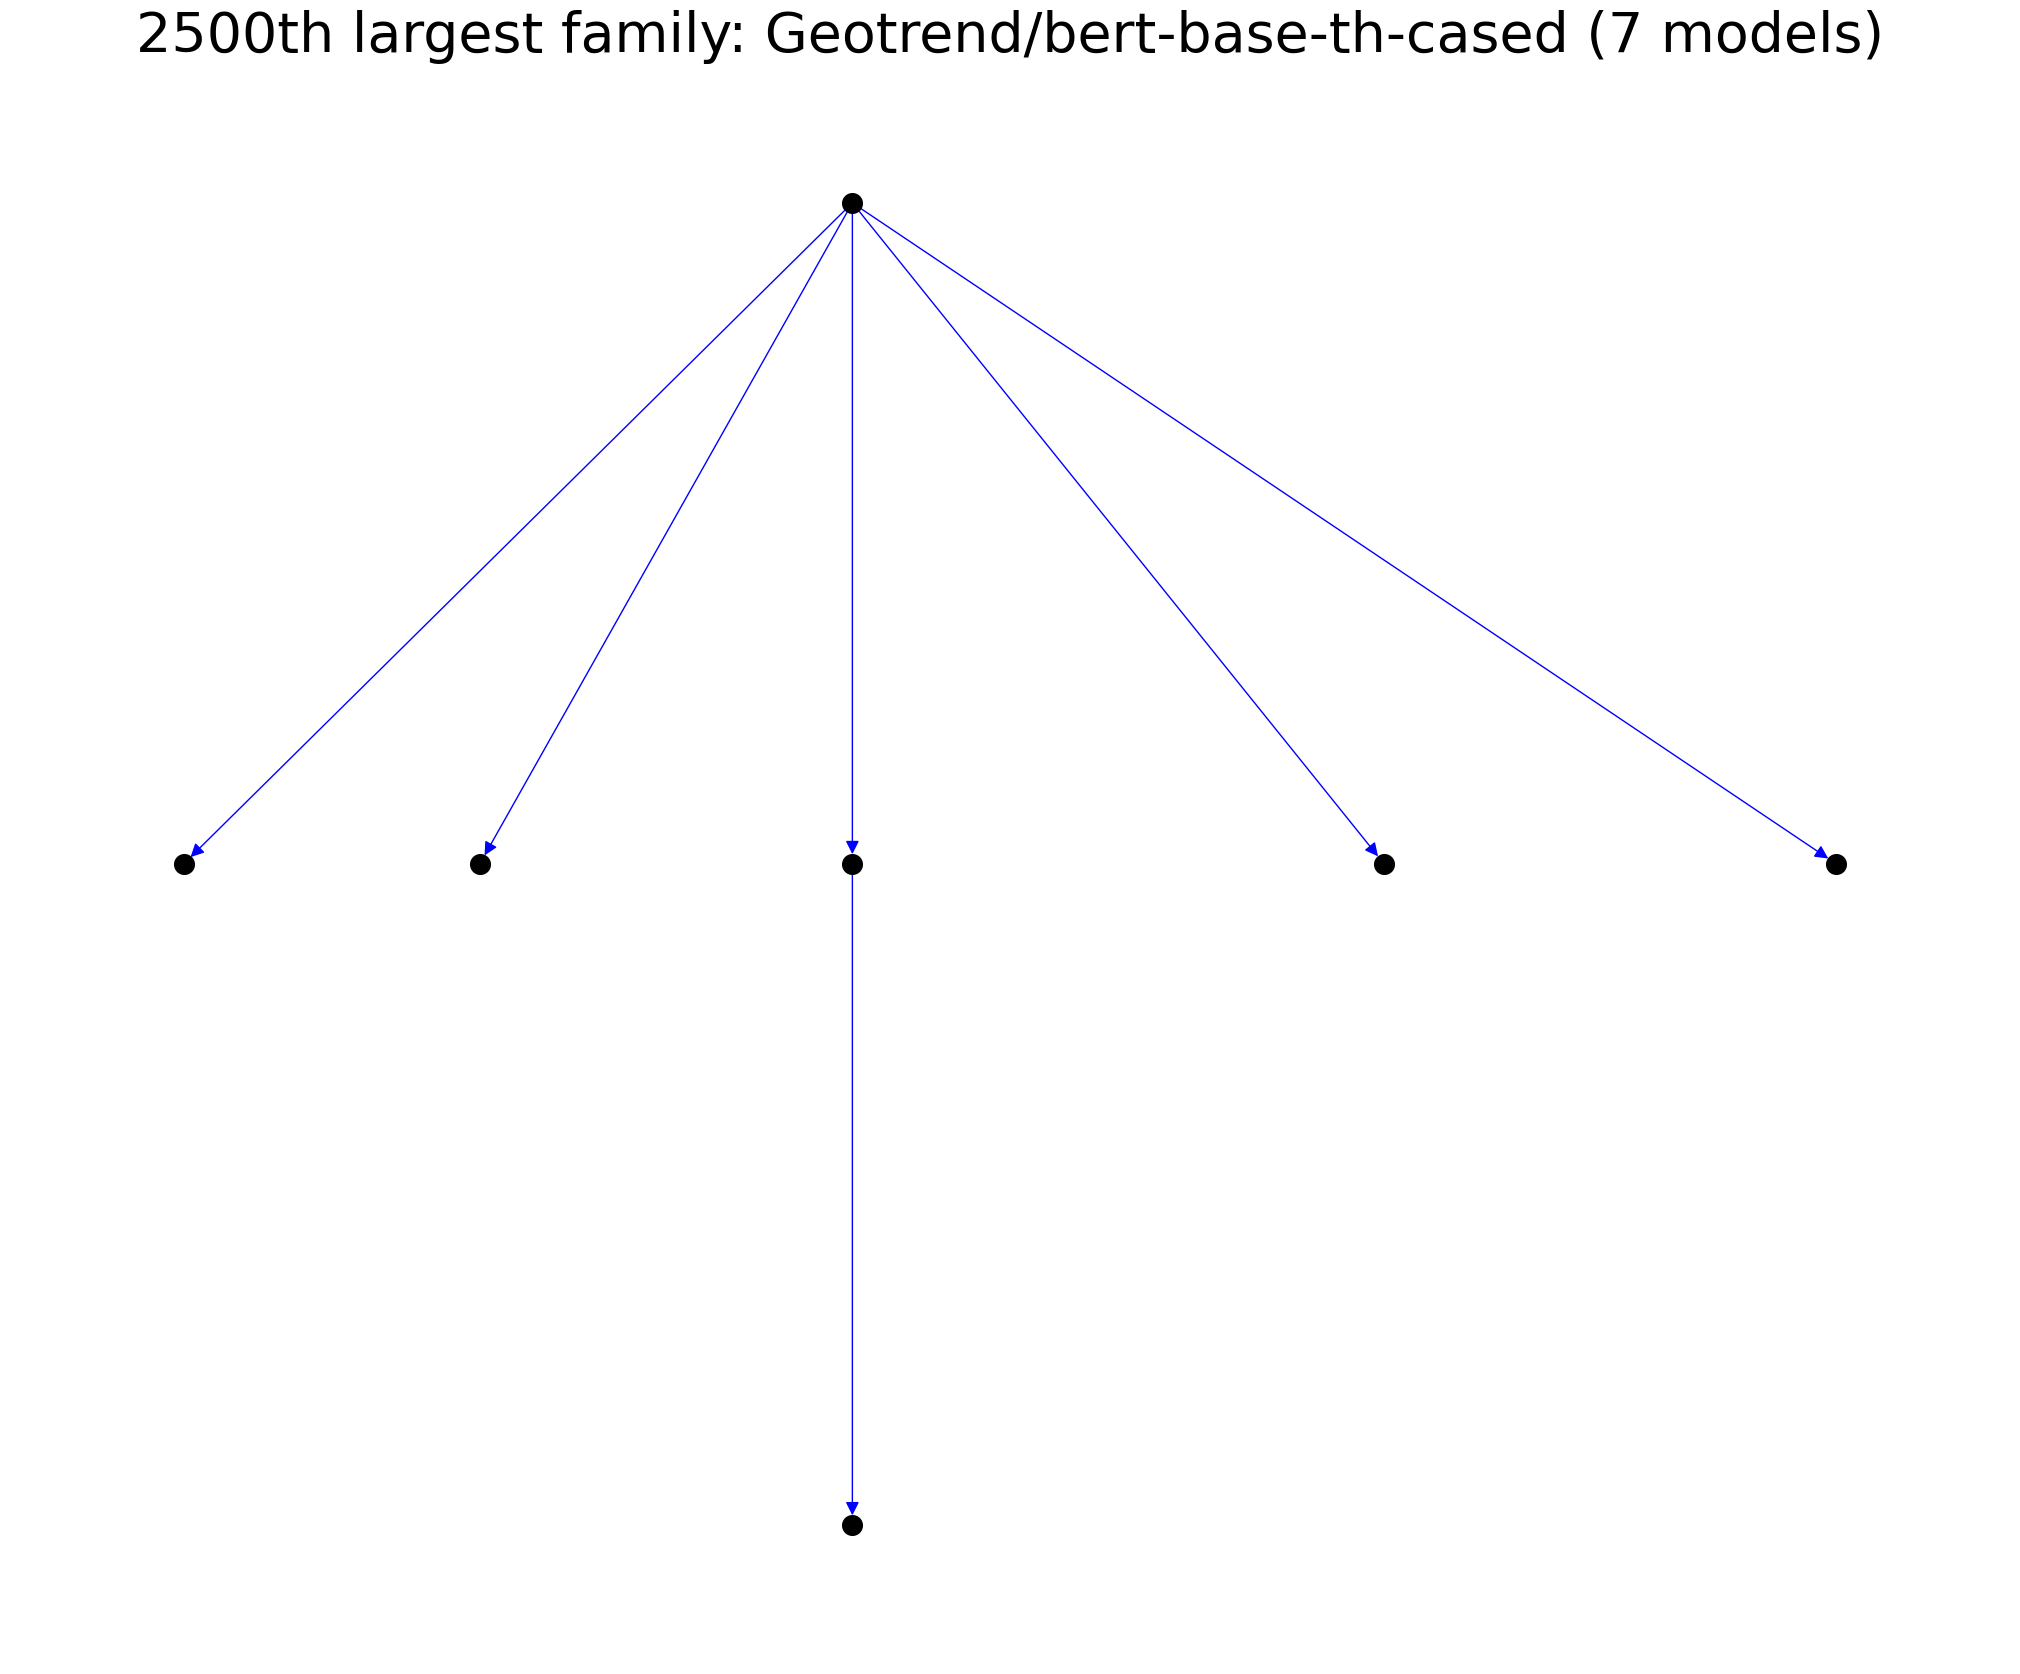

In [ ]:
import pydot
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

plt.figure(figsize=(20, 16))

pos = graphviz_layout(nth_largest_subgraph, prog="dot")
#pos = nx.circular_layout(nth_largest_subgraph)
nx.draw(nth_largest_subgraph, pos,
        with_labels=False,
        node_color="black",
        node_size=200, #50
        arrowstyle="-|>",
        arrowsize=20, #5, #20
        edgelist=[]  # This ensures no edges are drawn
        )

# Draw edges, colored by the feature edge_type   
# Assuming 'edge_type' is an attribute of the edges in the graph
edge_colors = []
for u, v, data in nth_largest_subgraph.edges(data=True):
    edge_type = data.get('edge_type', '')
    if edge_type == 'finetune':
        edge_colors.append('blue')
    elif edge_type == 'merge':
        edge_colors.append('pink')
    elif edge_type == 'quantized':
        edge_colors.append('green')
    elif edge_type == 'adapter':
        edge_colors.append('purple') 
    else:
        edge_colors.append('black')  # default color

nx.draw_networkx_edges(nth_largest_subgraph, pos, edge_color=edge_colors, arrows=True,
                      arrowstyle="-|>",
                      arrowsize= 20, #5, #20,
                      node_size=200 #50 #200
                      )

#Title
pos_dict = dict(pos)
base_node = list(nth_largest_subgraph.nodes())[np.argmax(np.array(list(pos_dict.values()))[:,1])]
print(base_node)
def ordinal(n):
    """Convert an integer into its ordinal representation."""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return str(n) + suffix

plt.title(f"{ordinal(n+1)} largest family: {base_node} ({nth_largest_subgraph.number_of_nodes()} models)"
          , fontsize=40)

# Add a legend with the arrow colors and labels         
#plt.legend(handles=[
    #plt.scatter([], [], c='purple', label='Adapter', marker='_', s=600),
    #plt.scatter([], [], c='blue', label='Finetune', marker='_', s=600),
    #plt.scatter([], [], c='pink', label='Merge', marker='_', s=600),
    #plt.scatter([], [], c='green', label='Quantized', marker='_', s=600)
#], loc='lower right', fontsize = 35)

#plt.savefig(f'figures/{n+1}th_largest_subgraph.png', dpi=300, bbox_inches='tight')
plt.show()